In [27]:
# Decision Tree Algorithm on Lung Cancer Dataset

In [26]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

import warnings
warnings.filterwarnings('ignore')

In [27]:
pima = pd.read_csv("datasets\greta_data.csv")

In [28]:
pima.head()

,Names,Age,Smokes,AreaQ,Alkhol,Result
0,GERALDINE,40,16,6,8,1
1,GIA,53,13,1,3,0
2,GIANNA,30,8,6,1,0
3,GISELLE,76,20,3,6,1
4,GRACE,35,17,6,3,0


In [29]:
#split dataset in features and target variable
feature_cols = ['Age', 'Smokes', 'AreaQ', 'Alkhol']
X = pima[feature_cols] # Features
y = pima.Result # Target variable

In [30]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [31]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [32]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7606666666666667


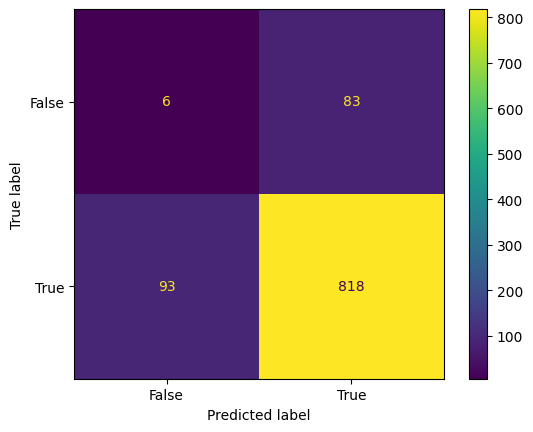

In [34]:
import matplotlib.pyplot as plt
import numpy

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [35]:
#importing libraries necessary for XAI
import shap
from lime import lime_tabular

In [36]:
#initialize SHAP for integration
shap.initjs()

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)


Variable Importance Plot - Global Interpretation


<Figure size 1000x600 with 0 Axes>

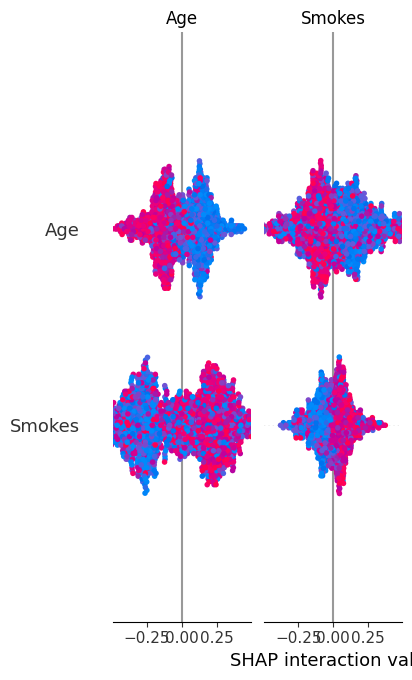

In [37]:
# SHAP Summary Plot - Global Interpretation
plt.figure(figsize=(10, 6))
print("Variable Importance Plot - Global Interpretation")
shap.summary_plot(shap_values, X_test)

In [38]:
# LIME Explanation
explainer_lime = lime_tabular.LimeTabularExplainer(X_train.values, mode="classification", feature_names=feature_cols)

In [39]:
# Select an instance for explanation (you can change the index as needed)
instance_index = 0
instance = X_test.iloc[[instance_index]]
exp = explainer_lime.explain_instance(instance.values[0], clf.predict_proba, num_features=len(feature_cols))
exp.show_in_notebook(show_table=True)